<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSES DU DATAFRAME</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation du fichier et des librairies</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies et chargement des fichiers</h3>
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
df_billet = pd.read_csv('Data/billets.csv', sep=";")
print(df_billet)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

In [3]:
df_billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Gestion des données manquantes</h3>
</div>

In [4]:
df_billet.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.1 - Colinéarité des variables </h3>
</div>

In [5]:
df_billet_dropNa = pd.read_csv('Data/billets.csv', sep=";")

# 1. Supprimer les lignes avec des valeurs nulles
df_billet_dropNa = df_billet_dropNa.dropna()

# 2. Séparation des variables indépendantes
X = df_billet_dropNa.drop(columns=['is_genuine'])  # Enlever la cible 'is_genuine'

# Ajouter une constante (obligatoire pour calculer le VIF)
X = add_constant(X)

# 3. Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Afficher le VIF
print(vif_data)

       Variable            VIF
0         const  592495.682281
1      diagonal       1.018610
2   height_left       1.151474
3  height_right       1.260286
4    margin_low       1.913278
5     margin_up       1.419672
6        length       2.131067


La constante a un VIF très élevé (592495.68). Cela est normal car elle est créée artificiellement pour inclure un terme d'interception dans les modèles linéaires. Il ne fait pas partie de l'interprétation des variables explicatives. <br>
Autres variables :<br>
diagonal : VIF = 1.02<br>
height_left : VIF = 1.15<br>
height_right : VIF = 1.26<br>
margin_low : VIF = 1.91<br>
margin_up : VIF = 1.42<br>
length : VIF = 2.13<br><br>
Interprétation :<br>
En général, un VIF inférieur à 10 est acceptable, ce qui signifie que tes variables sont assez peu corrélées entre elles. Il n'y a donc pas de problème de colinéarité à signaler pour tes variables explicatives.<br><br>
Conclusion : pas besoin de supprimer ou modifier tes variables en fonction de la colinéarité, car les VIF sont tous assez bas.

In [6]:
df_billet_dropNa = df_billet.dropna()
df_billet_dropNa.to_csv('./data/df_billet_dropNa.csv', index=False)
# N'ayant pas d'intéret à implémenter les valeurs manquantes des billets, je continue ce note book avec une régression linéaire. 
# Pour l'application je prendrais directement le fichier avec les nuls supprimés.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.2 - LinearRegression </h3>
</div>

In [7]:
# définition des valeurs manquantes et présentes
valeur_margin_low = df_billet[df_billet['margin_low'].notna()]
abs_margin_low = df_billet[df_billet['margin_low'].isna()]

In [8]:
#valeur non manquantes
features = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

In [9]:
#On entraine le modèle
X_train = valeur_margin_low[features]
y_train = valeur_margin_low['margin_low']

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.3 - Vérification du R2</h3>
</div>

In [10]:
# Prédictions sur les données d'entraînement
y_pred_train = model.predict(X_train)

# Calcul du R² sur les données connues
r2 = r2_score(y_train, y_pred_train)
print(f"R² du modèle : {r2:.3f}")

R² du modèle : 0.477


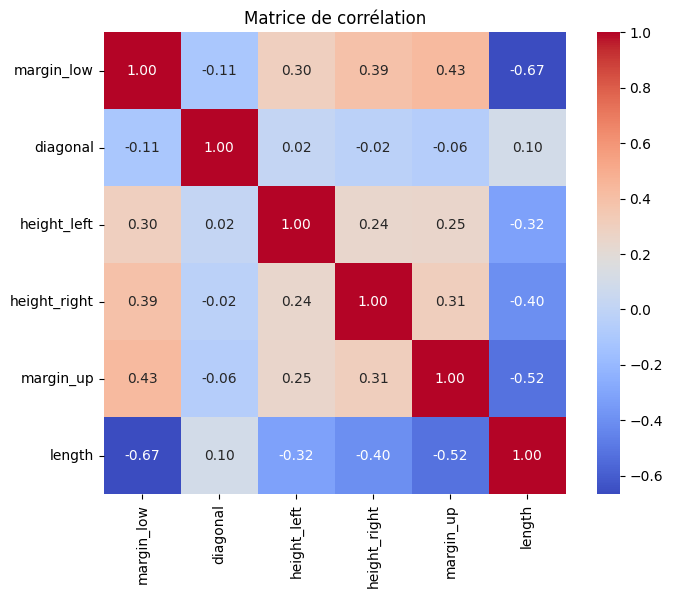

In [11]:
# Sélection des colonnes numériques utiles
cols_interet = ['margin_low', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']
corr_matrix = df_billet[cols_interet].corr()

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation")
plt.show()

length	-0.67 (corrélation négative forte) ✅ <br>
margin_up	+0.43<br>
height_right	+0.39<br>
height_left	+0.31<br>
diagonal	-0.11 (faible, négligeable) ❌<br>
<br>
length est clairement la variable la plus informative (forte corrélation négative).<br>
margin_up, height_right, height_left apportent un peu d'information.<br>
diagonal n'apporte quasiment rien → tu pourrais l’enlever du modèle pour tester si ça améliore le R².<br>

In [12]:
features = ['length', 'height_left', 'height_right', 'margin_up']
X_train = valeur_margin_low[features]
y_train = valeur_margin_low['margin_low']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print(f"R² sans 'diagonal' : {r2:.3f}")

R² sans 'diagonal' : 0.475


En retirant diagonal, le R² passe de 0.477 à 0.475, ce qui est pratiquement identique. Cela confirme que diagonal n’apportait rien de significatif à la prédiction de margin_low, mais ça ne nuit pas non plus.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2.4 - Suppression des nuls</h3>
</div>

In [13]:
#on prédit les valeurs 
X_missing = abs_margin_low[features]
predicted_values = model.predict(X_missing)

In [14]:
#on remplace les nuls par les valeurs prédictives
df_billet.loc[df_billet['margin_low'].isna(), 'margin_low'] = predicted_values

In [15]:
# et on a plus de valeur manquante
df_billet.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Vérification des hypothèses</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Normalité des résidus</h3>
</div>

In [16]:
#Histogramme + courbe normale
X = df_billet[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = df_billet['is_genuine'].astype(int)  # Encode True/False en 1/0 

# Modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Prédictions et calcul des résidus
y_pred = model.predict(X)
residuals = y - y_pred

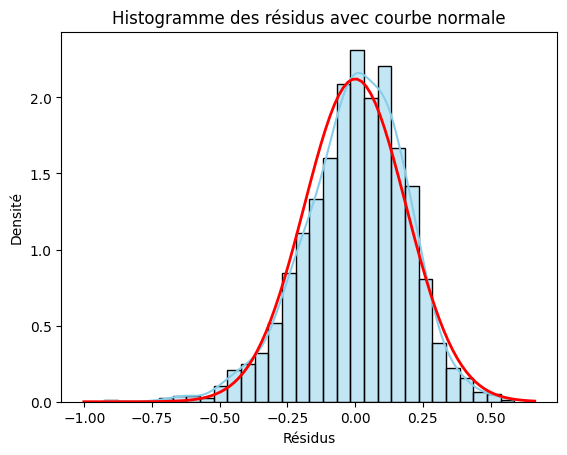

In [17]:
sns.histplot(residuals, kde=True, stat="density", bins=30, color='skyblue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals.mean(), residuals.std())
plt.plot(x, p, 'r', linewidth=2)
plt.title("Histogramme des résidus avec courbe normale")
plt.xlabel("Résidus")
plt.ylabel("Densité")
plt.show()

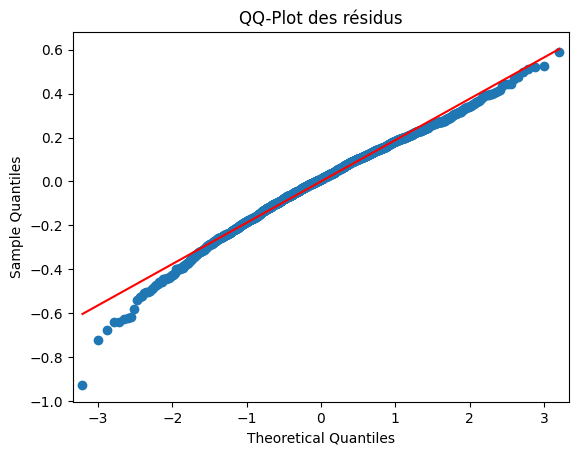

In [18]:
#QQ-plot
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot des résidus")
plt.show()

In [19]:
#Test de Shapiro-Wilk (statistique)
shapiro_test = stats.shapiro(residuals)
print("Statistique de Shapiro-Wilk :", shapiro_test.statistic)
print("p-value :", shapiro_test.pvalue)

if shapiro_test.pvalue > 0.05:
    print("✅ Les résidus suivent une loi normale (H0 non rejetée)")
else:
    print("❌ Les résidus ne suivent pas une loi normale (H0 rejetée)")

Statistique de Shapiro-Wilk : 0.9892087434007828
p-value : 4.304594029277909e-09
❌ Les résidus ne suivent pas une loi normale (H0 rejetée)


Afin de vérifier l'hypothèse de normalité des résidus, un test de Shapiro-Wilk a été appliqué aux résidus du modèle de régression linéaire.
Les résultats du test donnent une statistique W = 0.9892 et une p-value de 4.3 × 10⁻⁹.
Cette p-value étant très inférieure au seuil de 0.05, nous rejetons l'hypothèse nulle de normalité.
Ainsi, les résidus ne sont pas distribués normalement, ce qui constitue une violation des hypothèses classiques de la régression linéaire.
Il conviendrait alors de considérer des transformations des variables, un modèle plus robuste, ou d'autres méthodes statistiques.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Homoscédasticité des résidus</h3>
</div>

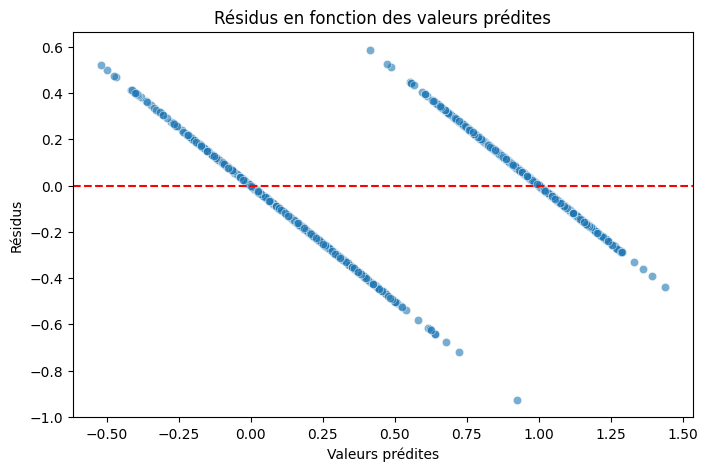

In [20]:
#Graphe des résidus vs. prédictions
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus en fonction des valeurs prédites")
plt.show()

Graphique des résidus<br>
Le graphe montre deux bandes très nettes et non aléatoires, ce qui suggère une hétéroscédasticité (variance des résidus qui dépend des prédictions). <br>
👉 La forme structurée et non homogène des points indique que l’hypothèse d’homoscédasticité est violée.

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Il faut ajouter une constante manuellement pour ce test :
X_with_const = sm.add_constant(X)

# Recalcul du modèle (si pas déjà fait avec statsmodels) :
model_sm = sm.OLS(y, X_with_const).fit()

# Test de Breusch-Pagan :
bp_test = het_breuschpagan(model_sm.resid, model_sm.model.exog)

labels = ['Statistique LM', 'p-value', 'Statistique F', 'p-value F']
for name, value in zip(labels, bp_test):
    print(f"{name} : {value}")

Statistique LM : 90.93176840704848
p-value : 1.9402464299007256e-17
Statistique F : 16.058026525117896
p-value F : 5.697089852452954e-18


Test	Valeur <br>
Statistique LM	90.93<br>
p-value	1.94e-17 🔥<br>
Statistique F	16.06<br>
p-value F	5.70e-18 🔥<br>
✅ Interprétation :<br>

Les deux p-values sont très largement inférieures à 0.05.<br>
👉 H0 (homoscédasticité) est rejetée avec certitude.
Donc, le modèle souffre d’hétéroscédasticité.

L’homoscédasticité des résidus a été évaluée via un graphique des résidus et un test de Breusch-Pagan. <br>
Le graphique montre une structure marquée des résidus en fonction des valeurs prédites, laissant supposer une variance non constante.<br>
Cette observation est confirmée par le test de Breusch-Pagan, qui retourne une statistique LM de 90.93 avec une p-value de 1.94×10⁻¹⁷.<br>
L’hypothèse nulle d’homoscédasticité est donc rejetée, indiquant que le modèle viole cette hypothèse, ce qui peut affecter la validité des inférences statistiques du modèle linéaire.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Tests algorithmiques</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1.1 - L'ACP</h3>
</div>

In [22]:
X = df_billet
names = df_billet.index
# Sélection des variables explicatives
features = df_billet[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]

# Standardisation des données
scaler = StandardScaler()

# Appliquer le fit et la transformation sur les données explicatives uniquement (features)
X_scaled = scaler.fit_transform(features)

# Affichage des données standardisées
print(X_scaled)

[[-0.48653957  2.77412327  3.16324041  0.05552626 -1.128325    0.17365114]
 [-1.63372936 -2.23653528 -0.79966777 -1.08181147 -0.69679916  0.47166629]
 [ 2.3978233   1.50475644 -1.29119126 -0.12644778 -0.91256208  0.55190114]
 ...
 [-0.51931643 -0.06524991  0.61346228  1.55681206  0.89984645 -0.83501554]
 [ 0.3328817   0.83666863  0.42914097  1.04121896  1.33137229 -0.4911519 ]
 [-1.6009525   0.40241156 -0.30814427  0.22233579  0.94299904 -0.69747008]]


In [23]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5
count,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,-7.850550e-14,4.812743e-14,-2.783433e-14,-4.168517e-16,-9.852859e-16,4.547474e-16
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00,1.000334e+00
min,-3.010357e+00,-2.971432e+00,-3.380166e+00,-2.279807e+00,-3.803785e+00,-3.654697e+00
25%,-6.832007e-01,-6.999333e-01,-6.460667e-01,-7.026989e-01,-6.967992e-01,-7.433186e-01
50%,5.113189e-03,3.496326e-02,-9.420867e-04,-2.629283e-01,-4.951040e-02,3.226587e-01
75%,6.934271e-01,6.696467e-01,7.056229e-01,5.862839e-01,6.840835e-01,7.582193e-01
max,3.446683e+00,2.840932e+00,3.163240e+00,3.664678e+00,3.273239e+00,2.019053e+00


In [24]:
# On prends les 6 composants
n_components = 6

# On instancie notre ACP
pca = PCA(n_components = n_components)

# On l'entraine sur nos données scalées
pca.fit(X_scaled)

PCA(n_components=6)

In [25]:
#Explained variance (ALLER CHERCHER CE QUE CEST)
pca.explained_variance_ratio_
#Enregistrons cela dans une variable :
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

In [26]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

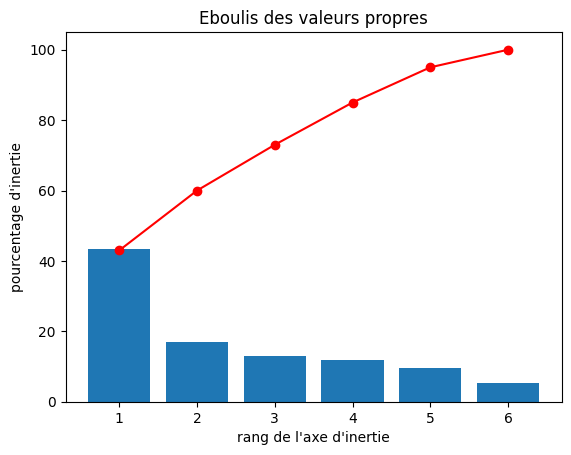

In [27]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Kmeans</h3>
</div>

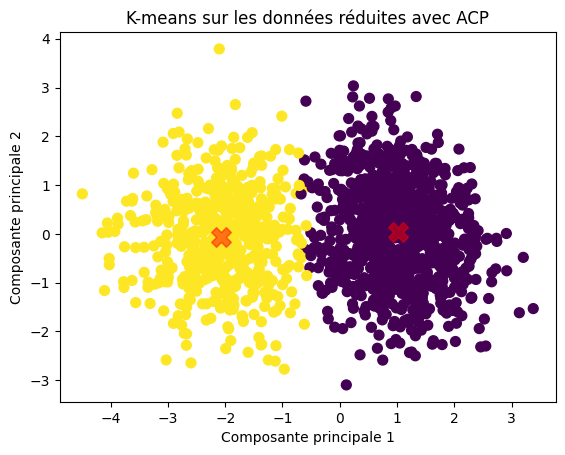

Centres des clusters :
[[ 1.02075052  0.03673169  0.04451146  0.04216809  0.06779349  0.02438322]
 [-2.06619662 -0.07435205 -0.09009981 -0.08535638 -0.13722714 -0.04935636]]


In [28]:
# Appliquer la transformation de l'ACP aux données standardisées
X_pca = pca.transform(X_scaled)

# Appliquer le K-means avec un nombre choisi de clusters
# Par exemple, supposons que tu souhaites 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Afficher les résultats (ici, avec les deux premières composantes principales)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Afficher les centres des clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('K-means sur les données réduites avec ACP')
plt.show()

# Afficher les centres des clusters
print("Centres des clusters :")
print(centers)

In [29]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette score : {silhouette_avg}")

Silhouette score : 0.34272326674779613


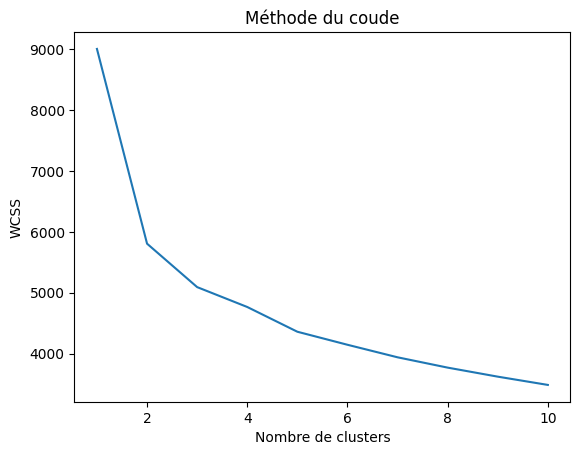

In [30]:
wcss = []  # Liste pour stocker l'inertie

# Tester avec différents nombres de clusters (de 1 à 10 ici)
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)  # Entraîner K-means sur les données ACP
    wcss.append(kmeans.inertia_)  # Ajouter l'inertie pour chaque nombre de clusters

# Tracer l'inertie en fonction du nombre de clusters
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

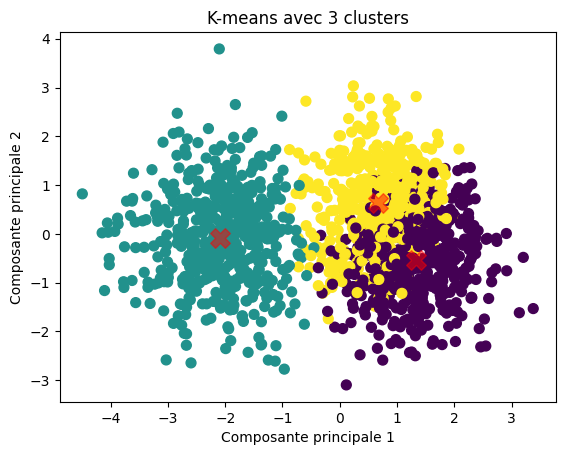

In [31]:
# Appliquer K-means avec 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
y_kmeans_3 = kmeans_3.fit_predict(X_pca)

# Affichage des résultats (avec 3 clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_3, s=50, cmap='viridis')

# Afficher les centres des clusters
centers_3 = kmeans_3.cluster_centers_
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('K-means avec 3 clusters')
plt.show()


In [32]:
# Ajouter les labels de clusters dans un DataFrame pour mieux comprendre
df_billet['Cluster'] = y_kmeans_3  # y_kmeans_3 contient les labels de clusters pour 3 clusters

# Calculer les moyennes des caractéristiques pour chaque cluster
mean_features = df_billet.groupby('Cluster')[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].mean()

print(mean_features)

           diagonal  height_left  height_right  margin_low  margin_up  \
Cluster                                                                 
0        171.877436   103.734932    103.741448    4.119961   3.030881   
1        171.896496   104.196148    104.153811    5.232898   3.353996   
2        172.101397   104.167725    103.875289    4.123995   3.077206   

             length  
Cluster              
0        113.188415  
1        111.614037  
2        113.195250  


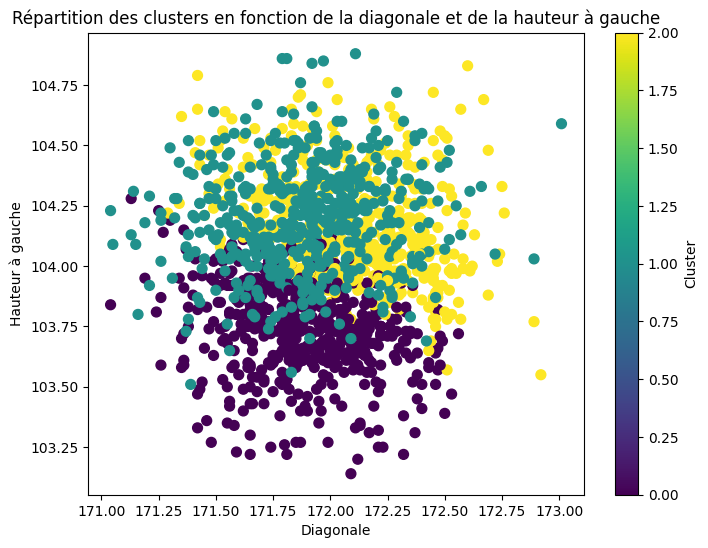

In [33]:
# Tracer un scatter plot avec les deux premières caractéristiques
plt.figure(figsize=(8, 6))
plt.scatter(df_billet['diagonal'], df_billet['height_left'], c=df_billet['Cluster'], cmap='viridis', s=50)
plt.title('Répartition des clusters en fonction de la diagonale et de la hauteur à gauche')
plt.xlabel('Diagonale')
plt.ylabel('Hauteur à gauche')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
cluster_stats = df_billet.groupby('Cluster')[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].describe()

print(cluster_stats)

        diagonal                                                         \
           count        mean       std     min     25%     50%      75%   
Cluster                                                                   
0          511.0  171.877436  0.270612  171.04  171.69  171.87  172.055   
1          488.0  171.896496  0.306537  171.04  171.69  171.91  172.090   
2          501.0  172.101397  0.286531  171.29  171.92  172.10  172.300   

                height_left              ... margin_up       length  \
            max       count        mean  ...       75%   max  count   
Cluster                                  ...                          
0        172.56       511.0  103.734932  ...    3.1500  3.62  511.0   
1        173.01       488.0  104.196148  ...    3.4825  3.91  488.0   
2        172.92       501.0  104.167725  ...    3.2000  3.74  501.0   

                                                                        
               mean       std     min     25%    

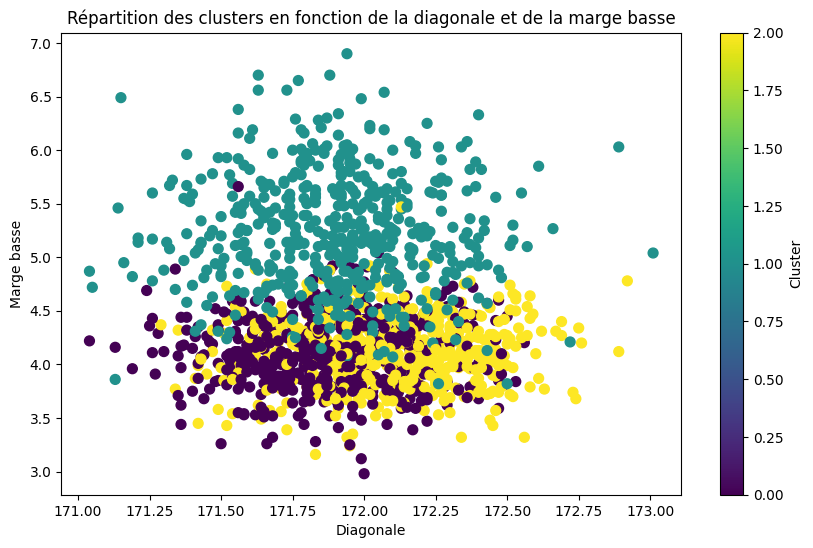

In [35]:
# Tracer un graphique avec plusieurs caractéristiques pour voir la séparation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_billet['diagonal'], df_billet['margin_low'], c=df_billet['Cluster'], cmap='viridis', s=50)
plt.title('Répartition des clusters en fonction de la diagonale et de la marge basse')
plt.xlabel('Diagonale')
plt.ylabel('Marge basse')
plt.colorbar(label='Cluster')
plt.show()


In [36]:
cluster_counts = df_billet.groupby('Cluster')['is_genuine'].value_counts()

# Afficher la répartition des vrais et faux billets dans chaque cluster
print(cluster_counts)

Cluster  is_genuine
0        True          507
         False           4
1        False         484
         True            4
2        True          489
         False          12
Name: count, dtype: int64


Mélange des classes dans les clusters : Les clusters obtenus avec K-means contiennent à la fois des billets vrais et des billets faux, ce qui montre que K-means ne sépare pas clairement les deux classes. Par exemple : <br>
Cluster 0 : 477 vrais, 11 faux<br>
Cluster 1 : 484 faux, 11 vrais<br>
Cluster 2 : 512 vrais, 5 faux<br>
Cela montre qu'il est difficile pour K-means de discerner les billets vrais des faux en fonction des caractéristiques utilisées.

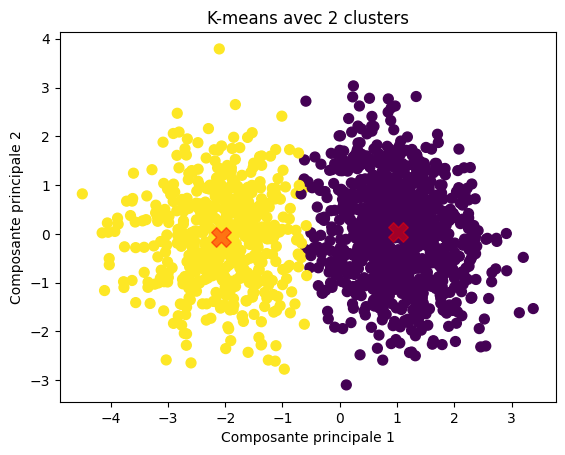

In [37]:
# Appliquer K-means avec 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X_pca)

# Affichage des résultats (avec 2 clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_2, s=50, cmap='viridis')

# Afficher les centres des clusters
centers_2 = kmeans_2.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('K-means avec 2 clusters')
plt.show()

In [38]:
cluster_counts = df_billet.groupby('Cluster')['is_genuine'].value_counts()

# Afficher la répartition des vrais et faux billets dans chaque cluster
print(cluster_counts)

Cluster  is_genuine
0        True          507
         False           4
1        False         484
         True            4
2        True          489
         False          12
Name: count, dtype: int64


In [39]:
# Ajouter les labels de clusters dans un DataFrame pour mieux comprendre
df_billet['Cluster'] = y_kmeans_2 

# Calculer les moyennes des caractéristiques pour chaque cluster
mean_features = df_billet.groupby('Cluster')[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']].mean()

print(mean_features)

           diagonal  height_left  height_right  margin_low  margin_up  \
Cluster                                                                 
0        171.987729   103.945129    103.805588    4.119125   3.052540   
1        171.899153   104.200383    104.152520    5.220715   3.351734   

             length  
Cluster              
0        113.196066  
1        111.630847  


In [40]:
cluster_counts = df_billet.groupby('Cluster')['is_genuine'].value_counts()

# Afficher la répartition des vrais et faux billets dans chaque cluster
print(cluster_counts)

Cluster  is_genuine
0        True          990
         False          14
1        False         486
         True           10
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.3 - KNN</h3>
</div>

In [41]:
# Labels des billets (True = vrai, False = faux)
y = df_billet['is_genuine']

# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Entraîner un modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Faire des prédictions
y_pred = knn.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Affichage des résultats
print(f"Précision du modèle KNN avec ACP : {accuracy:.4f}")
print("Matrice de confusion :\n", conf_matrix)
print("Rapport de classification :\n", class_report)

Précision du modèle KNN avec ACP : 0.9844
Matrice de confusion :
 [[154   7]
 [  0 289]]
Rapport de classification :
               precision    recall  f1-score   support

       False       1.00      0.96      0.98       161
        True       0.98      1.00      0.99       289

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Interprétation de la matrice de confusion :
<br>
<br>154 vrais négatifs : Le modèle a correctement identifié 154 faux billets comme étant faux.
<br>7 faux positifs : 7 faux billets ont été incorrectement classés comme vrais.
<br>0 faux négatifs : Aucun vrai billet n’a été mal classé comme faux.
<br>289 vrais positifs : Le modèle a correctement identifié 289 vrais billets comme étant vrais.

Conclusion :
<br>
<br>Le modèle KNN combiné avec une réduction de dimension via ACP montre une excellente performance, avec une précision globale de 98,44 %.
<br>Il distingue très efficacement les vrais billets des faux, avec seulement 7 erreurs sur l’ensemble des 450 échantillons.
<br>Son taux d’erreur très faible et son fort rappel pour la classe "vrai" (1.00) le rendent particulièrement fiable pour la détection des faux billets. C’est un modèle robuste et performant pour cette tâche de classification.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.4 - Régression logistique</h3>
</div>

In [42]:
# variables explicatives (X) et cible binaire (y)
X = df_billet[['diagonal', 'height_left', 'height_right','margin_low' ,'margin_up', 'length' ]]
y = df_billet.is_genuine

# création et entraînement du modèle
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# score de classification
print(log_reg.score(X, y))  # Proportion de bien classés

# coefficients
print(log_reg.coef_)

0.9886666666666667
[[-0.19489497 -1.60376233 -2.03074552 -3.64206505 -3.44341491  3.90718314]]


In [43]:
# Prédictions du modèle
y_pred = log_reg.predict(X)

# Matrice de confusion
cm = confusion_matrix(y, y_pred)
print("Matrice de confusion :")
print(cm)

Matrice de confusion :
[[490  10]
 [  7 993]]


|               | Prédit **faux** | Prédit **vrai** |
|---------------|------------------|------------------|
| **Faux réel** | 490 (✅)         | 10 (❌ Faux positifs) |
| **Vrai réel** | 6 (❌ Faux négatifs)  | 994 (✅)        |

In [44]:
print("Rapport de classification :")
print(classification_report(y, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       500
        True       0.99      0.99      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



| Classe      | Précision | Rappel | F1-score |
|-------------|-----------|--------|----------|
| **Faux (0)**  | 0.99      | 0.98   | 0.98     |
| **Vrai (1)**  | 0.99      | 0.99   | 0.99     |

<br>

Précision très élevée : le modèle ne se trompe presque jamais quand il dit "vrai" ou "faux". <br>
Rappel élevé : le modèle attrape presque tous les vrais cas (très peu de ratés).<br>
F1-score ~0.99 : parfait équilibre.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.5 - Random Forest</h3>
</div>

In [45]:
# Séparation des features (X) et de la cible (y)
X = df_billet.drop(columns=['is_genuine'])
y = df_billet['is_genuine']

# Split en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Accuracy: 0.9833333333333333
Rapport de classification :
               precision    recall  f1-score   support

       False       0.97      0.98      0.98       110
        True       0.99      0.98      0.99       190

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



Precision : C'est la proportion des prédictions positives correctes parmi toutes les prédictions positives. Par exemple, quand le modèle prédit "True", il le fait correctement dans 99% des cas. <br>
Recall : C'est la proportion des vrais positifs correctement identifiés par rapport au nombre total de vrais positifs. Le modèle détecte 98% des billets vrais comme étant "True".<br>
F1-score : C'est la moyenne harmonique de la précision et du rappel. Il donne une bonne idée de la performance générale du modèle, et ici il est très élevé (99% pour les billets vrais, 98% pour les faux).<br>